In [ ]:
from google.colab import files
uploaded = files.upload()

Saving blank.jpg to blank (4).jpg
Saving rectangle1.jpeg to rectangle1.jpeg
Saving rectangle2.jpeg to rectangle2.jpeg
Saving rectangle3.jpeg to rectangle3.jpeg
Saving rectangle4.jpeg to rectangle4.jpeg
Saving rectangle.jpeg to rectangle (10).jpeg


WHERE EACH RECTANGLE ARE CROPED INTO INDIVIDUAL IMAGE AND THEN PROVDED AS INPUT


<ipython-input-7-acf76fea794e>:21: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


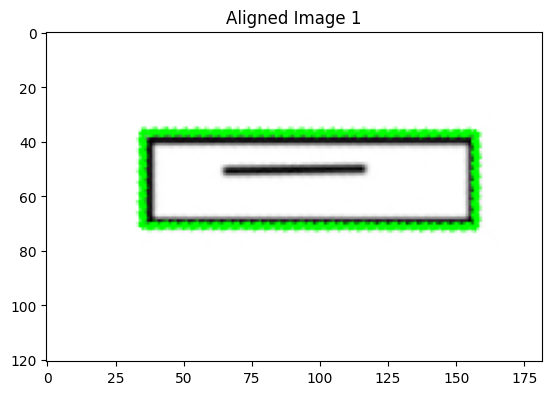

Aligned image saved as aligned_rectangle1.jpeg


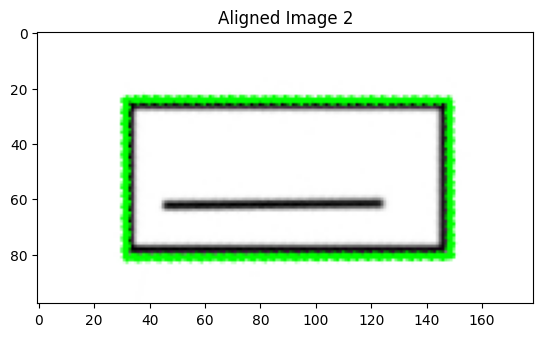

Aligned image saved as aligned_rectangle2.jpeg


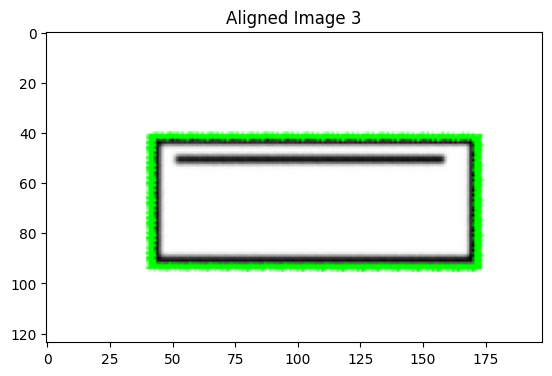

Aligned image saved as aligned_rectangle3.jpeg


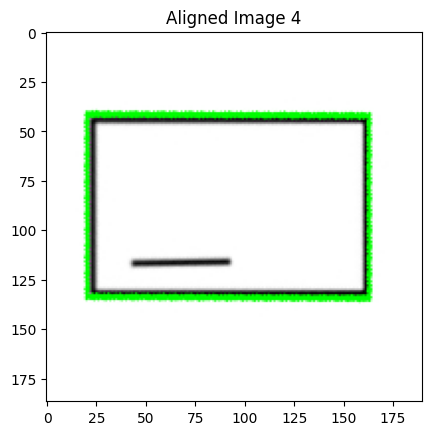

Aligned image saved as aligned_rectangle4.jpeg


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def align_rectangle(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    aligned_image = image.copy()

    for contour in contours:
        # Get the minimum area rectangle that can enclose the contour
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        # Draw the contours and the minimum area rectangle on the image
        cv2.drawContours(aligned_image, [box], 0, (0, 255, 0), 2)

        # Calculate the angle of rotation
        angle = rect[2]
        width, height = rect[1]

        # Ensure the longer side is horizontal
        if width < height:
            angle += 90

        # Get the image dimensions
        (h, w) = aligned_image.shape[:2]
        center = (w // 2, h // 2)

        # Calculate the rotation matrix
        M = cv2.getRotationMatrix2D(center, angle, 1.0)

        # Perform the rotation
        aligned_image = cv2.warpAffine(aligned_image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return aligned_image

def process_and_save_images(image_files):
    for i, image_file in enumerate(image_files):
        # Load the image
        image = cv2.imread(image_file)

        # Check if the image loaded successfully
        if image is None:
            print(f"Error: Could not load image {image_file}. Check the file path or upload the image.")
            continue

        # Align the image
        aligned_image = align_rectangle(image)

        # Display the aligned image
        plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Aligned Image {i + 1}')
        plt.show()

        # Save the aligned image to a new file
        output_file = f'aligned_{image_file}'
        cv2.imwrite(output_file, aligned_image)
        print(f"Aligned image saved as {output_file}")

# List of image files to process
image_files = ['rectangle1.jpeg','rectangle2.jpeg','rectangle3.jpeg','rectangle4.jpeg']

# Process and save the images
process_and_save_images(image_files)


WHERE ALL FOUR RECTANGLE ARE INPUTED AS SINGLE IMAGE


<ipython-input-10-f05bd06d7632>:21: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


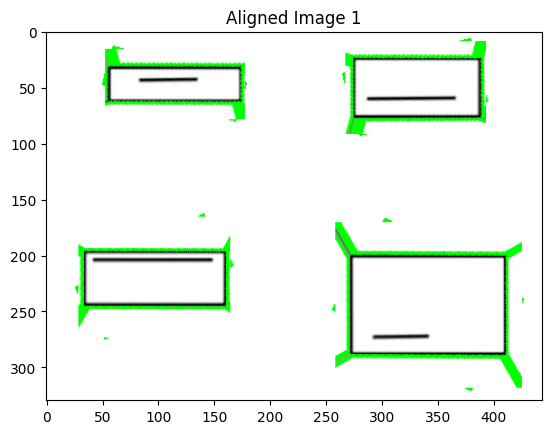

Aligned image saved as aligned_rectangle.jpeg


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def align_rectangle(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    aligned_image = image.copy()

    for contour in contours:
        # Get the minimum area rectangle that can enclose the contour
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        # Draw the contours and the minimum area rectangle on the image
        cv2.drawContours(aligned_image, [box], 0, (0, 255, 0), 2)

        # Calculate the angle of rotation
        angle = rect[2]
        width, height = rect[1]

        # Ensure the longer side is horizontal
        if width < height:
            angle += 90

        # Get the bounding box to crop the rectangle region
        x, y, w, h = cv2.boundingRect(contour)

        # Extract the region of interest (ROI) containing the rectangle
        roi = aligned_image[y:y+h, x:x+w]

        # Get the center of the ROI for rotation
        roi_center = (w // 2, h // 2)

        # Calculate the rotation matrix for the ROI
        M = cv2.getRotationMatrix2D(roi_center, angle, 1.0)

        # Perform the rotation on the ROI
        rotated_roi = cv2.warpAffine(roi, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

        # Place the rotated ROI back into the aligned image
        aligned_image[y:y+h, x:x+w] = rotated_roi

    return aligned_image

def process_and_save_images(image_files):
    for i, image_file in enumerate(image_files):
        # Load the image
        image = cv2.imread(image_file)

        # Check if the image loaded successfully
        if image is None:
            print(f"Error: Could not load image {image_file}. Check the file path or upload the image.")
            continue

        # Align the image
        aligned_image = align_rectangle(image)

        # Display the aligned image
        plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Aligned Image {i + 1}')
        plt.show()

        # Save the aligned image to a new file
        output_file = f'aligned_{image_file}'
        cv2.imwrite(output_file, aligned_image)
        print(f"Aligned image saved as {output_file}")

# List of image files to process
image_files = ['rectangle.jpeg']

# Process and save the images
process_and_save_images(image_files)
